# Numerical Integration: Integrals of Two and Three Variables

**Rio Agustian Gilang Fernnado**

**Advanced Material Science and Nanotechnology**

The ```scipy.integrate``` methods dblquad nd tplquad evaluate double and triple integrals, repectively.


\begin{align}
&\int_a^b \int_{g(x)}^{h(x)} f(x, \, y) \mathrm{d}y \; \mathrm{d}x, \\
&\int_a^b \int_{g(x)}^{h(x)} \int_{q(x,y)}^{r(x,y)} f(x, \, y, \, z) \mathrm{d}z \; \mathrm{d}y \; \mathrm{d}x,
\end{align}

Note that the limits on all but the oyter must be provided as callable on=bjects (e.g., a Python funstion) since they may depend on other variables. As an example, take the integral of the function $f(x,y) = xy^3$ over the region enclosed by the line y = x and the parabola y = x^2. The line aand curve meet at x = 0 and x = 1, and since y = x^2 lies below y = x for o < x < 1, the integral is

$$
I = \int_0^1 \int_{x^2}^x xy^3 \mathrm{d}y \; \mathrm{d}x.
$$


![Figure](graph.png)

Figure 1. The region bounded by the line y = x and the curve y = x^2

The region is illustrated in Figure 1, which can be generated using Matplotlib:

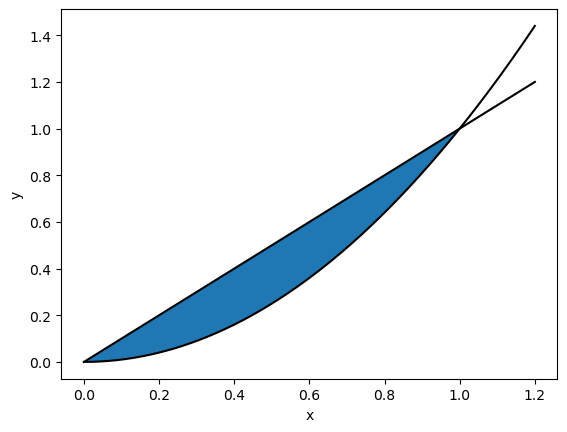

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 1.2, 1000)
h = x**2
g, h = x**2, x

plt.plot(x, h, c='black')
plt.plot(x, g, c='black')
plt.fill_between(x[x <= 1], g[x <= 1], h[x <= 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

This particular integral can be evaluated analytically:

\begin{align}
I &= \int_0^1 \left[ \frac{1}{4} xy^4 \right]_{y=x^2}^{y=x} \mathrm(d)x \\ 
 &= \int_0^1 \frac{1}{4} x^5 - \frac{1}{4}x^9 \mathrm{d}x \\
 &=\left[ \frac{1}{24}x^6 - \frac{1}{40}x^{10}\right]_0^1 \\
 &=\frac{1}{60}
\end{align}

Numerically, using dblquad, the function must be defined with the innermost variable (y) given as the first argument, and its limits themeselves defined as functions the outermost variable (x):

In [24]:
from scipy.integrate import dblquad, tplquad

def func(y, x):
    return x * y**3

g = lambda x: x**2 # lower limit of y-integral
h = lambda x: x # upper limit of y-integral
a, b = 0, 1 # limits of the x-integral

dblquad(func, a, b, g, h)


(0.016666666666666666, 5.826435989325954e-16)

which is $\frac{1}{60}$ witihin the numerical error in the quadrature.

To calculate the area of the region, one can simply integrate the function f(x, y) = 1 over it:

In [20]:
dblquad(lambda y, x: 1, 0, 1, g, h)

(0.16666666666666666, 2.7755575615628914e-15)

and, indeed:

$$
\int_0^1 \int_{x^2}^x \mathrm{d}y \mathrm{d}x = \int_0^1 x - x^2 \mathrm{d}x = \frac{1}{2} - \frac{1}{3} = \frac{1}{6}.
$$

A similar approach can be taken with triple integrals, such as those over three dimensional space. The volume of the unit sphere can be expressed in Cartesian coordinates as eight times the integral over this positive octant:

$$
8 \int_0^1 \int_0^{\sqrt{1-x^2}} \int_0^{\sqrt{1-x^2-y^2}} \mathrm{d}z \; \mathrm{d}y \; \mathrm{d}x ,
$$

Using tplquad, with the inner limits again expressed as anonymous functions:

In [32]:
A, _ = tplquad(lambda z, y, x:1,
               0, 1,
               lambda x: 0, lambda x: np.sqrt(1 - x**2),
               lambda x, y: 0, lambda x, y: np.sqrt(1- x**2 - y**2))
8*A

4.188790204786391

whish is $4\pi/3$ within numerical error.

The same volume expressed in speherical polar coordinates becomes

$$
\int_0^{2\pi} \int_0^{\pi} \int_0^{1} r^2 \sin{\theta} \; \mathrm{d}r \; \mathrm{d} \theta \;\mathrm{d} \phi \
$$

In [38]:
tplquad(lambda phi, theta, r: r**2 * np.sin(theta),
       0, 1,
       lambda theta: 0, lambda theta: np.pi, 
       lambda theta, phi: 0, lambda theta, phi: 2*np.pi)


(4.18879020478639, 1.389095079694993e-13)